In [0]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader

import numpy as np

from model_utils import lr_scheduler, restore_weights, save_model
from data_generator import SemanticSegmentationDataset
from train import build_model, train_loop
from evaluate import evaluate, show_sample_segmentation

from pathlib import Path

### Define parameters

In [0]:
batch_size = 1
shuffle = True
epoch_start = 0
epochs = 100
T_save = 1
T_print = 100
num_classes = 4
cuda = True

pretrained_weight_fname = 'resnet_v2-200epoch.pth'
weights_dir = 'weights/'
data_dir = 'drinks/'
train_gt_fname = 'segmentation_train.npy'
test_gt_fname = 'segmentation_test.npy'

# make path if not exist
Path(weights_dir).mkdir(parents=True, exist_ok=True)

### Initialize dataloaders

In [0]:
trainset = SemanticSegmentationDataset(data_dir, train_gt_fname, cuda=cuda)
trainloader = DataLoader(trainset,
                         batch_size=batch_size,
                         shuffle=shuffle)
testset = SemanticSegmentationDataset(data_dir, test_gt_fname, cuda=cuda)
testloader = DataLoader(testset,
                        batch_size=batch_size,
                        shuffle=shuffle)

## Training

### Initialize model

In [13]:
# initialize model
channels, height, width = 3, 480, 640
input_shape = (batch_size, channels, height, width)

model, backbone = build_model(input_shape=input_shape,
                              n_classes=num_classes,
                              weights_dir=weights_dir,
                              pretrained_weight_fname=pretrained_weight_fname,
                              cuda=cuda)

Restoring weights from weights/resnet_v2-200epoch.pth


### Initialize training parameters

In [7]:
# initialize training parameters
# based on https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
criterion = nn.CrossEntropyLoss()   # categorical crossentropy
optimizer = optim.Adam(model.parameters(), lr=1e-3)
scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lr_scheduler)

Learning rate: 0.001


### Train loop

In [0]:
train_loop(model, criterion, optimizer, scheduler, trainloader,
           epochs=epochs, epoch_start=epoch_start,
           T_print=T_print, T_save=T_save)

In [14]:
m_iou, m_pla = evaluate(model, testloader)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


0) IoU = 0.759785	pla = 75.390625
1) IoU = 0.766765	pla = 76.308594
2) IoU = 0.789330	pla = 69.036461
3) IoU = 0.767533	pla = 69.824219
4) IoU = 0.716653	pla = 65.648438
5) IoU = 0.729207	pla = 64.459633
6) IoU = 0.733726	pla = 65.669640
7) IoU = 0.750185	pla = 66.088867
8) IoU = 0.743248	pla = 67.048615
9) IoU = 0.759071	pla = 67.937500
10) IoU = 0.749911	pla = 68.579544
11) IoU = 0.759540	pla = 68.798828
12) IoU = 0.766141	pla = 68.659859
13) IoU = 0.750467	pla = 69.171318
14) IoU = 0.750102	pla = 68.802086
15) IoU = 0.746813	pla = 69.804688
16) IoU = 0.755782	pla = 69.788605
17) IoU = 0.758966	pla = 69.639755
18) IoU = 0.765657	pla = 69.814964
19) IoU = 0.763310	pla = 69.480469
20) IoU = 0.762337	pla = 69.428940
21) IoU = 0.765102	pla = 69.430046
22) IoU = 0.766337	pla = 69.612770
23) IoU = 0.770753	pla = 69.830727
24) IoU = 0.764045	pla = 69.928123
25) IoU = 0.767080	pla = 70.103668
26) IoU = 0.762954	pla = 70.561340
27) IoU = 0.760416	pla = 70.558037
28) IoU = 0.757345	pla = 70.48

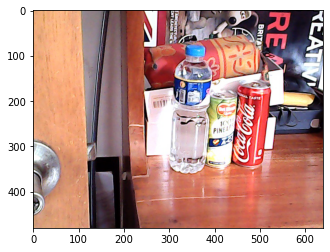

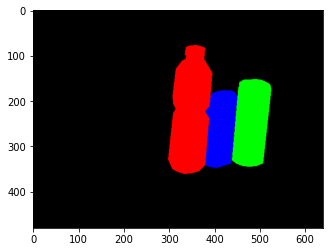

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2973: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


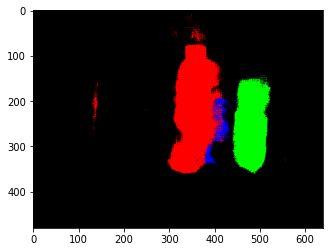

IoU: tensor(0.7079)
pla: tensor(78.2812)


In [15]:
show_sample_segmentation(model, testloader)